# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Bima Ardhia Vardhan
- **Email:** sch.bimaardhiavardhan@gmail.com
- **ID Dicoding:** bima_ardhia_vardhan

## Menentukan Pertanyaan Bisnis



- Bagaimana pola rata-rata jumlah pengguna sepeda (casual dan registered) sepanjang hari dalam seminggu?

- Bagaimana pengaruh kondisi cuaca dan musim terhadap rata-rata jumlah pengguna sepeda per jam?

## Import Semua Packages/Library yang Digunakan

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [46]:
df = pd.read_csv('/content/drive/MyDrive/Dicoding/Analisis Data/Dataset/hour.csv')

In [47]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [48]:
df_day = pd.read_csv('/content/drive/MyDrive/Dicoding/Analisis Data/Dataset/day.csv')

In [49]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Terdapat dua dataset dengan informasi yang sama, namun format pencatatan waktu berbeda: per hari dan per jam.
- Memilih dataset yang mencatat data per jam karena lebih spesifik.
- Data per jam memungkinkan untuk mendeteksi perbedaan atau perubahan yang lebih detail.
- Penggunaan data per jam memungkinkan analisis yang lebih akurat dan relevan.
- Data per jam membantu menangkap fluktuasi yang mungkin tidak terlihat dalam data harian.

### Assessing Data

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [51]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [52]:
df.apply(lambda x: len(x.unique()))

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [53]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [54]:
df.duplicated().sum()

0

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [56]:
df['calculated_count'] = df['casual'] + df['registered']

df['is_count_valid'] = df['cnt'] == df['calculated_count']

invalid_counts = df[~df['is_count_valid']]

if invalid_counts.empty:
    print("Semua nilai count valid.")
else:
    print("Ada ketidaksesuaian pada nilai count:")
    print(invalid_counts[['casual', 'registered', 'count', 'calculated_count']])

df.drop(columns=['calculated_count', 'is_count_valid'], inplace=True)



Semua nilai count valid.


In [57]:
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['cnt'] < lower_bound) | (df['cnt'] > upper_bound)]

outliers.shape[1]


17

**Insight:**
- Melihat data unique untuk mengidentifikasi kategori kolom, membedakan antara data kategorikal dan numerik.
- Memeriksa data duplikat.
- Memeriksa data null, dan memastikan tidak ada data yang hilang (null) dalam dataset.
- Mengecek apakah `registered` + `casual` sama dengan `count` dan memastikan bahwa hasilnya benar, yang menunjukkan konsistensi dan validitas data yang baik.
- Memeriksa adanya outlier di kolom `count`, dan meskipun ditemukan outlier, saya memutuskan untuk mempertahankannya karena:
  - Setelah memeriksa, saya menemukan bahwa `casual` + `registered` memang sama dengan `count`, yang menunjukkan bahwa data tersebut valid.
  - Alasan lain adalah karena analisis ini hanya sampai pada tahap eksplorasi data, dan jika diperlukan untuk tahap machine learning, saya bisa melakukan normalisasi data terlebih dahulu.
- Mempertahankan outlier sebagai bagian dari data yang valid dengan alasan logis dan memastikan bahwa data tersebut sesuai dengan konteks analisis yang dilakukan.

### Cleaning Data

In [58]:
df = df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count',
                       'dteday': 'date'})

cols = ['season' , 'month' , 'hour' , 'holiday' , 'weekday' , 'workingday' , 'weather', 'year']

for col in cols:
    df[col] = df[col].astype('category')

weathersit_mapping = {
    1: "Clear",
    2: "Cloudy",
    3: "Light Rain",
    4: "Heavy Rain"
}

season_mapping = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

df["weather"] = df["weather"].map(weathersit_mapping)
df["season"] = df["season"].map(season_mapping)

year_mapping = {0: 2011, 1: 2012}
month_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
weekday_mapping = {
    0: "Sun", 1: "Mon", 2: "Tues", 3: "Wed",
    4: "Thurs", 5: "Fri", 6: "Sat"
}

df["year"] = df["year"].map(year_mapping)
df["month"] = df["month"].map(month_mapping)
df["weekday"] = df["weekday"].map(weekday_mapping)

print("DataFrame setelah mapping:")
df.head()


DataFrame setelah mapping:


,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [59]:
df = df.drop_duplicates()

In [60]:
df = df.drop(columns = ['instant'])


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   date        17379 non-null  object  
 1   season      17379 non-null  category
 2   year        17379 non-null  category
 3   month       17379 non-null  category
 4   hour        17379 non-null  category
 5   holiday     17379 non-null  category
 6   weekday     17379 non-null  category
 7   workingday  17379 non-null  category
 8   weather     17379 non-null  category
 9   temp        17379 non-null  float64 
 10  atemp       17379 non-null  float64 
 11  humidity    17379 non-null  float64 
 12  windspeed   17379 non-null  float64 
 13  casual      17379 non-null  int64   
 14  registered  17379 non-null  int64   
 15  count       17379 non-null  int64   
dtypes: category(8), float64(4), int64(3), object(1)
memory usage: 1.2+ MB


In [62]:
# Ekspor DataFrame ke file CSV
df.to_csv('data_export.csv', index=False)


**Insight:**
- Melakukan perubahan nama kolom untuk memberikan label yang lebih deskriptif dan memudahkan pemahaman:
  - `weathersit` menjadi `weather`
  - `yr` menjadi `year`
  - `mnth` menjadi `month`
  - `hr` menjadi `hour`
  - `hum` menjadi `humidity`
  - `cnt` menjadi `count`
- Mengubah beberapa kolom seperti `season`, `month`, `hour`, `holiday`, `weekday`, `workingday`, `weather`, dan `year` menjadi tipe data kategori untuk efisiensi memori dan analisis yang lebih cepat.
- Melakukan reverse encoding pada kolom yang mengandung kode numerik untuk menggantinya dengan nilai deskriptif yang lebih mudah dipahami, seperti:
  - `weather` dengan deskripsi kondisi cuaca.
  - `season` dengan deskripsi musim.
  - `year`, `month`, dan `weekday` dengan format yang lebih informatif.
- Menghapus data duplikat.
- Menghapus kolom `instant` karena dianggap kurang relevan dengan analisis yang sedang dilakukan.

## Exploratory Data Analysis (EDA)

#### Fitur Kategorikal

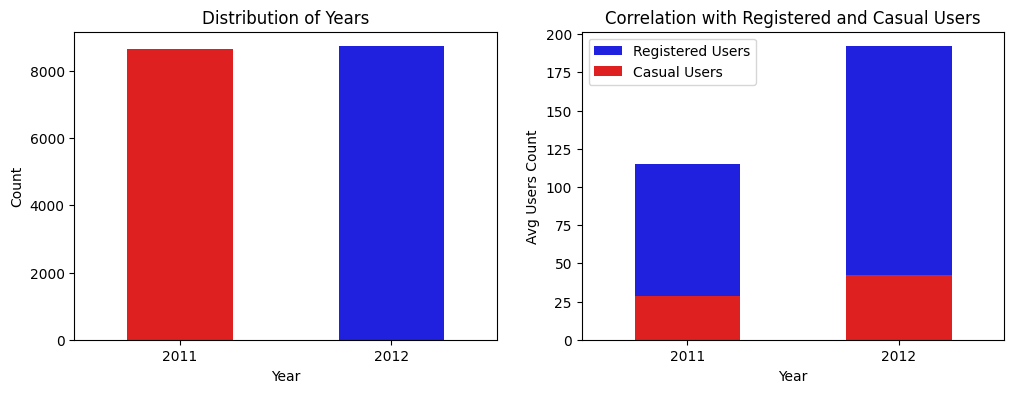

In [63]:
# @title 1. Year
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.countplot(x='year', data=df, ax=ax[0],palette=['red','blue'], width=0.5)
ax[0].set_title('Distribution of Years')
ax[0].set_xticks([0, 1], ['2011', '2012'])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')

sns.barplot(x='year',y='registered',data=df, label='Registered Users', color='blue', ax=ax[1], width=0.5, errorbar=None)
sns.barplot(x='year',y='casual',data=df, label='Casual Users', color='red', ax=ax[1], width=0.5, errorbar=None)
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xticks([0, 1], ['2011', '2012'])
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
fig.show();

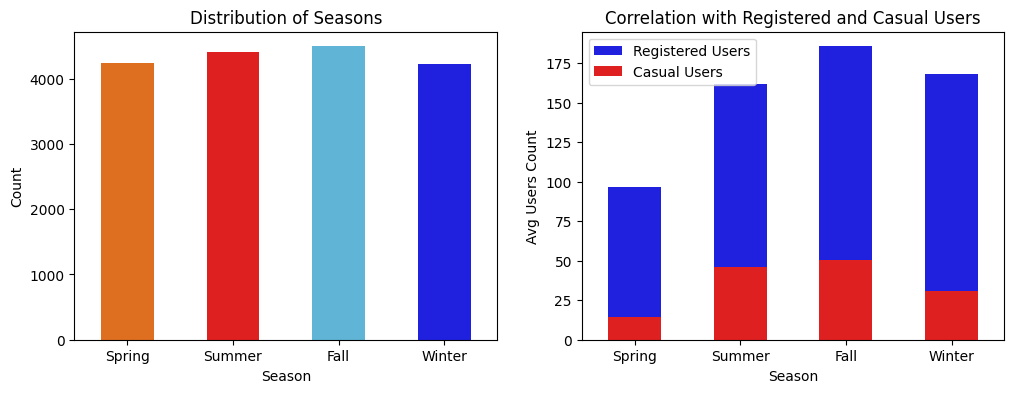

In [64]:
# @title 2. Season
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.countplot(x='season', data=df, ax=ax[0],palette=['#FF6A00','red','#4dbce8','blue'], width=0.5)
ax[0].set_title('Distribution of Seasons')
ax[0].set_xticks([0 ,1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Count')

sns.barplot(x='season',y='registered',data=df, label='Registered Users', color='blue', ax=ax[1], width=0.5, errorbar=None)
sns.barplot(x='season',y='casual',data=df, label='Casual Users', color='red', ax=ax[1], width=0.5, errorbar=None)
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xticks([0 ,1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
fig.show();

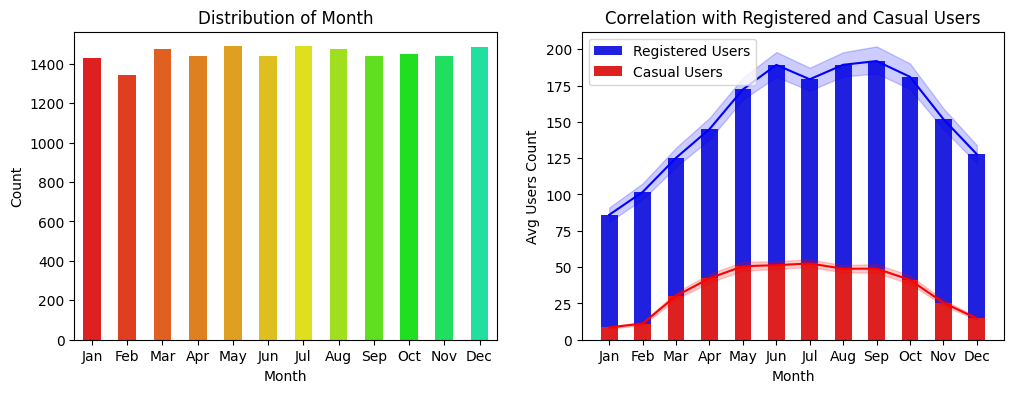

In [65]:
# @title 3. Month
fig, ax = plt.subplots(1,2,figsize=(12,4))
color_codes = [
    '#FF0000', '#FF2A00', '#FF5500', '#FF8000',
    '#FFAA00', '#FFD400', '#FFFF00', '#AAFF00',
    '#55FF00', '#00FF00', '#00FF55', '#00FFAA'
]

sns.countplot(x='month', data=df, ax=ax[0], width=0.5, palette=color_codes)
ax[0].set_title('Distribution of Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Count')

sns.barplot(x='month',y='registered',data=df, label='Registered Users', color='blue', ax=ax[1], width=0.5, errorbar=None)
sns.lineplot(x='month',y='registered',data=df, color='blue', ax=ax[1])
sns.barplot(x='month',y='casual',data=df, label='Casual Users', color='red', ax=ax[1], width=0.5, errorbar=None)
sns.lineplot(x='month',y='casual',data=df, color='red', ax=ax[1])

ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
fig.show();

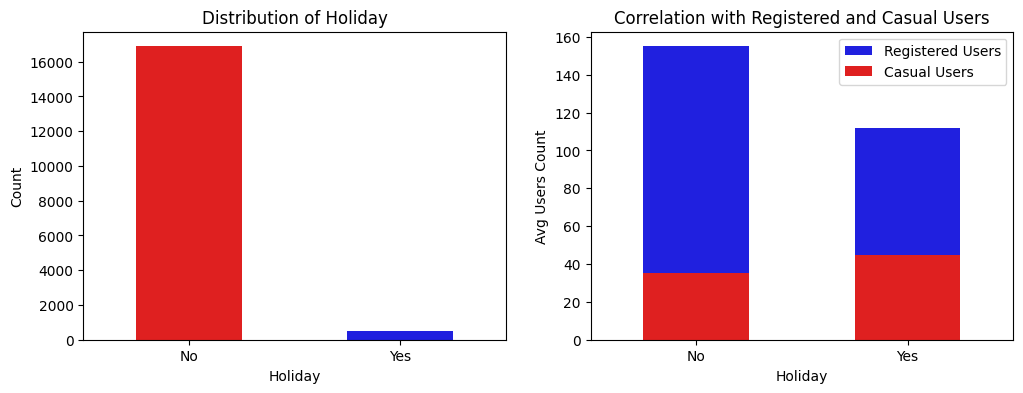

In [66]:
# @title 4. Holiday
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.countplot(x='holiday', data=df, ax=ax[0],palette=['red','blue'], width=0.5)
ax[0].set_title('Distribution of Holiday')
ax[0].set_xticks([0, 1], ['No', 'Yes'])
ax[0].set_xlabel('Holiday')
ax[0].set_ylabel('Count')

sns.barplot(x='holiday',y='registered',data=df, label='Registered Users', color='blue', ax=ax[1], width=0.5, errorbar=None)
sns.barplot(x='holiday',y='casual',data=df, label='Casual Users', color='red', ax=ax[1], width=0.5, errorbar=None)
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xticks([0, 1], ['No', 'Yes'])
ax[1].set_xlabel('Holiday')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
fig.show();

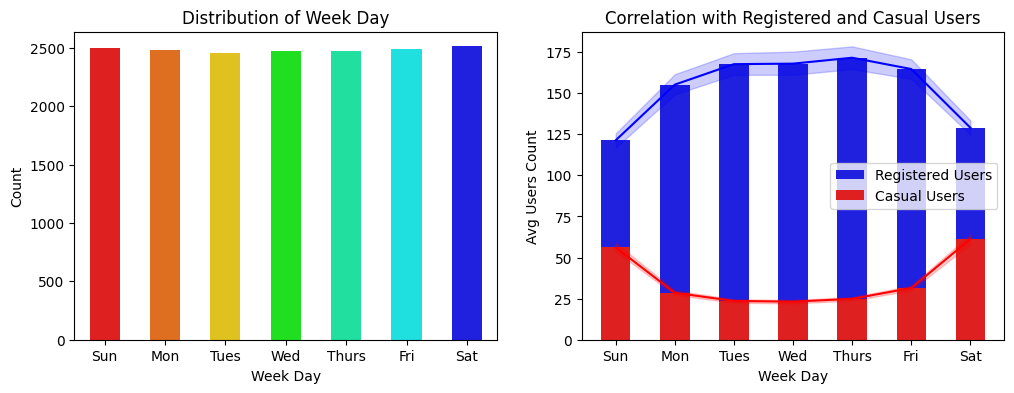

In [67]:
# @title 5. Week Day
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.countplot(x='weekday', data=df, ax=ax[0],palette=['#FF0000', '#FF6A00', '#FFD800', '#00FF00', '#00FFAA', '#00FFFF', '#0000FF']
, width=0.5)
ax[0].set_title('Distribution of Week Day')
ax[0].set_xlabel('Week Day')
ax[0].set_ylabel('Count')

sns.barplot(x='weekday',y='registered',data=df, label='Registered Users', color='blue', ax=ax[1], width=0.5, errorbar=None)
sns.lineplot(x='weekday',y='registered',data=df, color='blue', ax=ax[1])
sns.barplot(x='weekday',y='casual',data=df, label='Casual Users', color='red', ax=ax[1], width=0.5, errorbar=None)
sns.lineplot(x='weekday',y='casual',data=df, color='red', ax=ax[1])

ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xlabel('Week Day')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
fig.show();

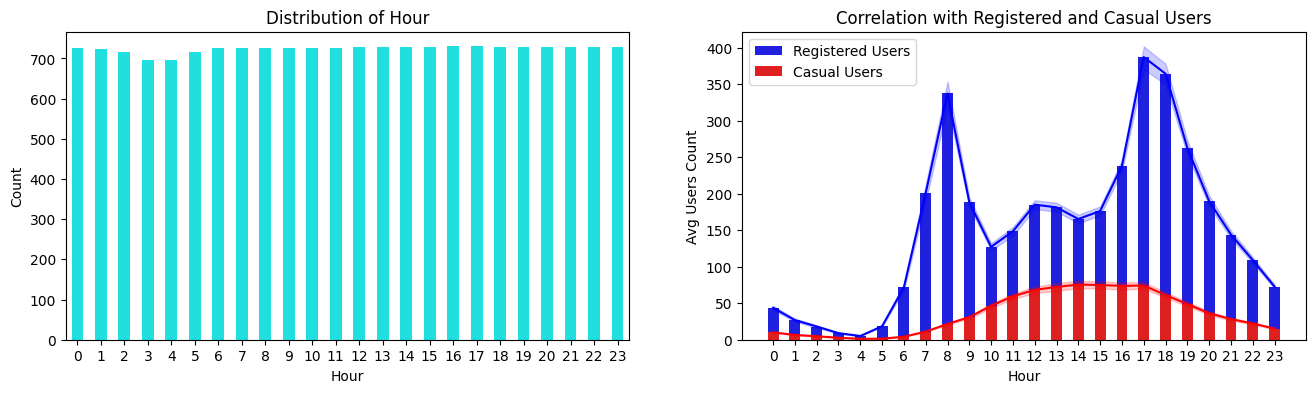

In [68]:
# @title 6. Hour
fig, ax = plt.subplots(1,2,figsize=(16,4))

sns.countplot(x='hour', data=df, ax=ax[0],palette=['#00FFFF']
, width=0.5)
ax[0].set_title('Distribution of Hour')
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Count')

sns.barplot(x='hour',y='registered',data=df, label='Registered Users', color='blue', ax=ax[1], width=0.5, errorbar=None)
sns.lineplot(x='hour',y='registered',data=df, color='blue', ax=ax[1])
sns.barplot(x='hour',y='casual',data=df, label='Casual Users', color='red', ax=ax[1], width=0.5, errorbar=None)
sns.lineplot(x='hour',y='casual',data=df, color='red', ax=ax[1])

ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
fig.show();

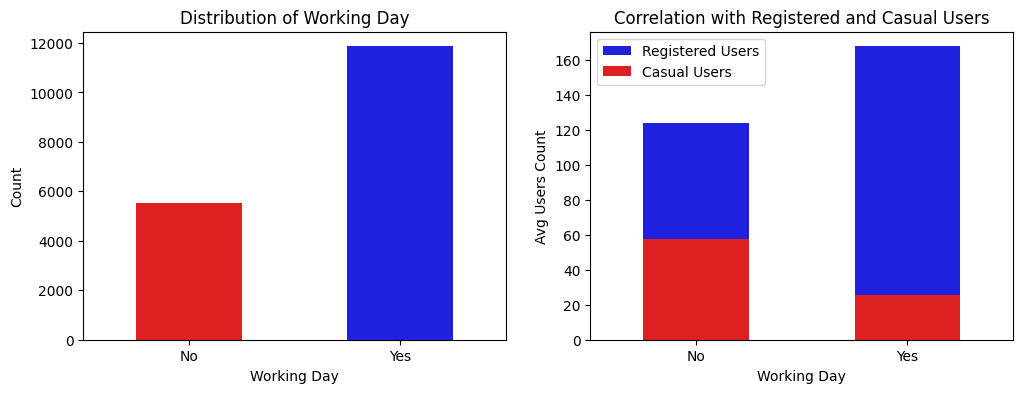

In [69]:
# @title 7. Working Day
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.countplot(x='workingday', data=df, ax=ax[0],palette=['red','blue'], width=0.5)
ax[0].set_title('Distribution of Working Day')
ax[0].set_xticks([0, 1], ['No', 'Yes'])
ax[0].set_xlabel('Working Day')
ax[0].set_ylabel('Count')

sns.barplot(x='workingday',y='registered',data=df, label='Registered Users', color='blue', ax=ax[1], width=0.5, errorbar=None)
sns.barplot(x='workingday',y='casual',data=df, label='Casual Users', color='red', ax=ax[1], width=0.5, errorbar=None)
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xticks([0, 1], ['No', 'Yes'])
ax[1].set_xlabel('Working Day')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
fig.show();

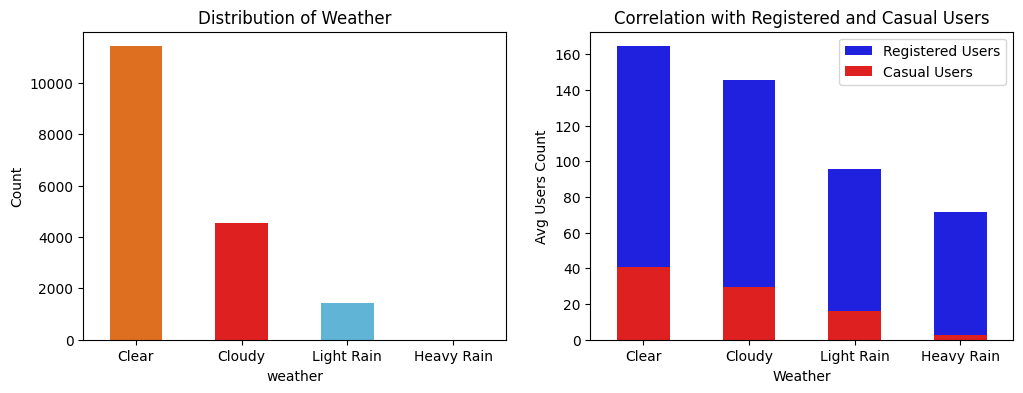

In [70]:
# @title 8. Weather
fig, ax = plt.subplots(1,2,figsize=(12,4))

# Distribution Figure
sns.countplot(x='weather', data=df, ax=ax[0],palette=['#FF6A00','red','#4dbce8','blue'], width=0.5)
ax[0].set_title('Distribution of Weather')
ax[0].set_xlabel('weather')
ax[0].set_ylabel('Count')

# Correlation Figure
sns.barplot(x='weather',y='registered',data=df, label='Registered Users', color='blue', ax=ax[1], width=0.5, errorbar=None)
sns.barplot(x='weather',y='casual',data=df, label='Casual Users', color='red', ax=ax[1], width=0.5, errorbar=None)
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xlabel('Weather')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
fig.show();

**Insight:**
- Tahun 2012 mencatat jumlah penyewaan sepeda yang lebih tinggi.
- Musim gugur menunjukkan tingkat penyewaan sepeda tertinggi, sedangkan musim semi mencatat yang terendah.
- Bulan September memiliki jumlah penyewaan sepeda tertinggi, sementara Januari mencatat yang terendah.
- Penyewaan sepeda cenderung lebih rendah saat hari libur.
- Sebaliknya, penyewaan sepeda meningkat pada hari kerja.
- Kondisi cuaca cerah berhubungan dengan jumlah penyewaan sepeda yang lebih tinggi.

#### Fitur Numerikal


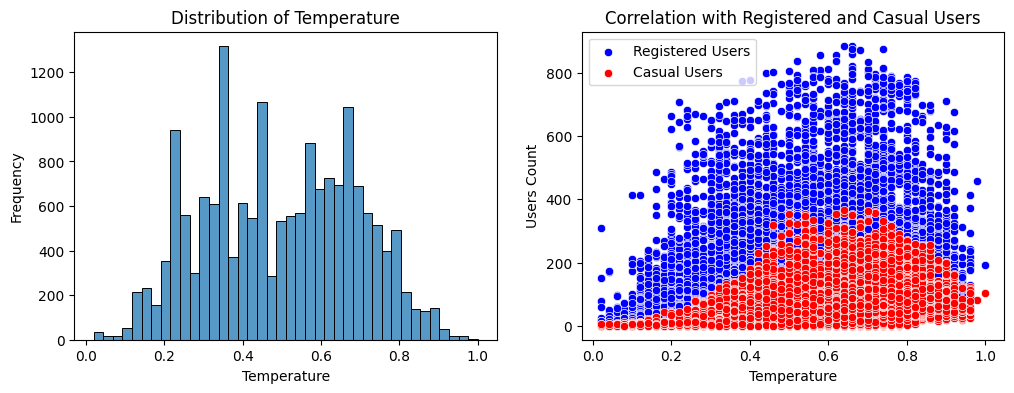

In [71]:
# @title 1. Temperature
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.histplot(x='temp', data=df, ax=ax[0])
ax[0].set_title('Distribution of Temperature')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('Frequency')

sns.scatterplot(x='temp',y='registered',data=df, label='Registered Users', color='blue', ax=ax[1])
sns.scatterplot(x='temp',y='casual',data=df, label='Casual Users', color='red', ax=ax[1])
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('Users Count')

plt.legend()
fig.show();

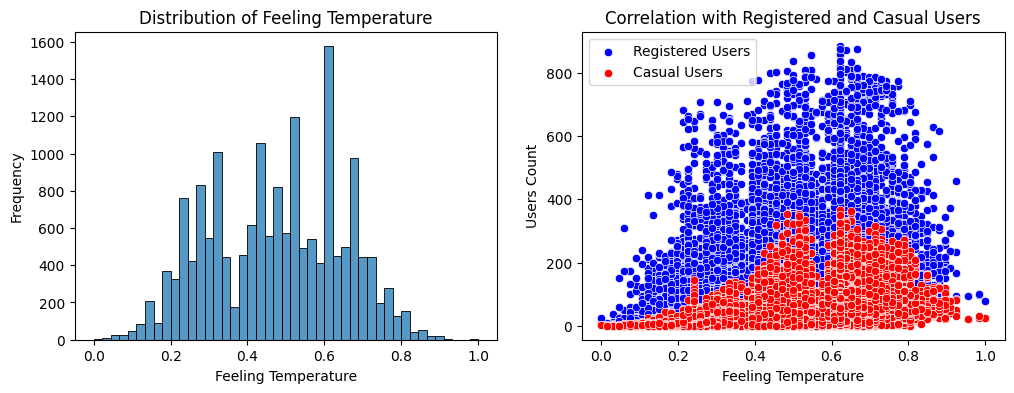

In [72]:
# @title 2. Feeling Temperature
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.histplot(x='atemp', data=df, ax=ax[0])
ax[0].set_title('Distribution of Feeling Temperature')
ax[0].set_xlabel('Feeling Temperature')
ax[0].set_ylabel('Frequency')

sns.scatterplot(x='atemp',y='registered',data=df, label='Registered Users', color='blue', ax=ax[1])
sns.scatterplot(x='atemp',y='casual',data=df, label='Casual Users', color='red', ax=ax[1])
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xlabel('Feeling Temperature')
ax[1].set_ylabel('Users Count')

plt.legend()
fig.show();

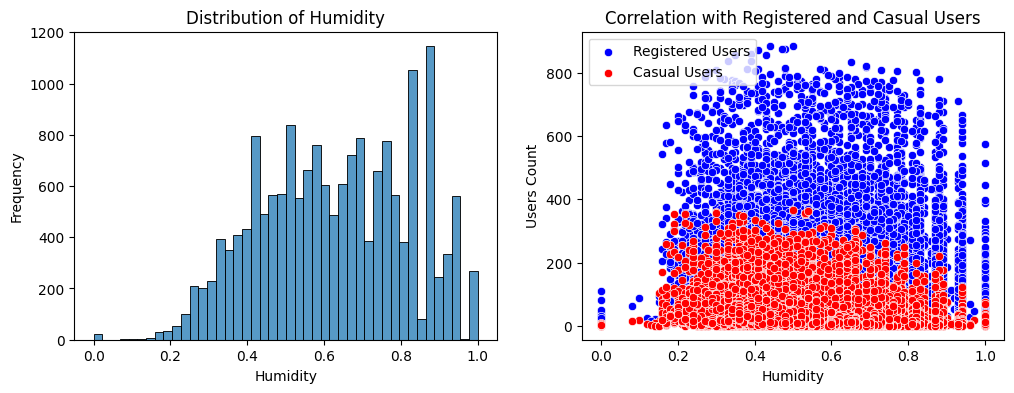

In [73]:
# @title 3. Humidity
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.histplot(x='humidity', data=df, ax=ax[0])
ax[0].set_title('Distribution of Humidity')
ax[0].set_xlabel('Humidity')
ax[0].set_ylabel('Frequency')

sns.scatterplot(x='humidity',y='registered',data=df, label='Registered Users', color='blue', ax=ax[1])
sns.scatterplot(x='humidity',y='casual',data=df, label='Casual Users', color='red', ax=ax[1])
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xlabel('Humidity')
ax[1].set_ylabel('Users Count')

plt.legend()
fig.show();

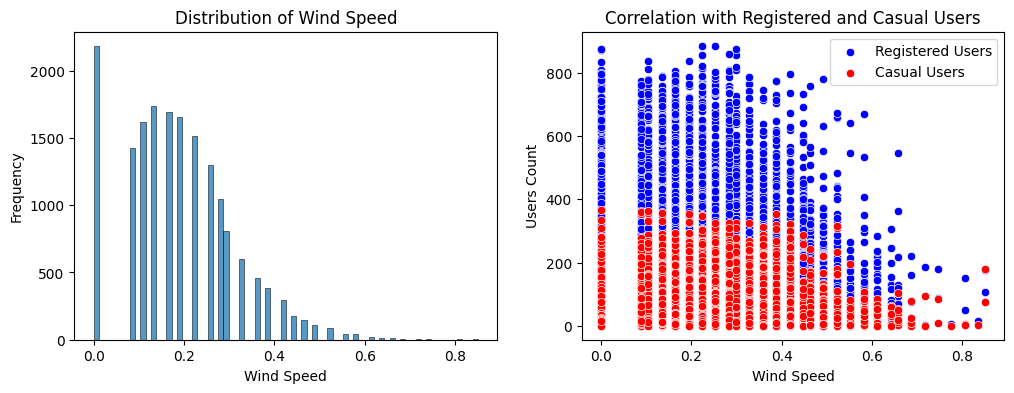

In [74]:
# @title 4. Wind Speed
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.histplot(x='windspeed', data=df, ax=ax[0])
ax[0].set_title('Distribution of Wind Speed')
ax[0].set_xlabel('Wind Speed')
ax[0].set_ylabel('Frequency')

sns.scatterplot(x='windspeed',y='registered',data=df, label='Registered Users', color='blue', ax=ax[1])
sns.scatterplot(x='windspeed',y='casual',data=df, label='Casual Users', color='red', ax=ax[1])
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xlabel('Wind Speed')
ax[1].set_ylabel('Users Count')

plt.legend()
fig.show();

**Insight:**
- Tidak terdapat korelasi yang signifikan antara suhu, kelembapan, dan kecepatan angin dengan jumlah penyewaan sepeda.

#### Explore

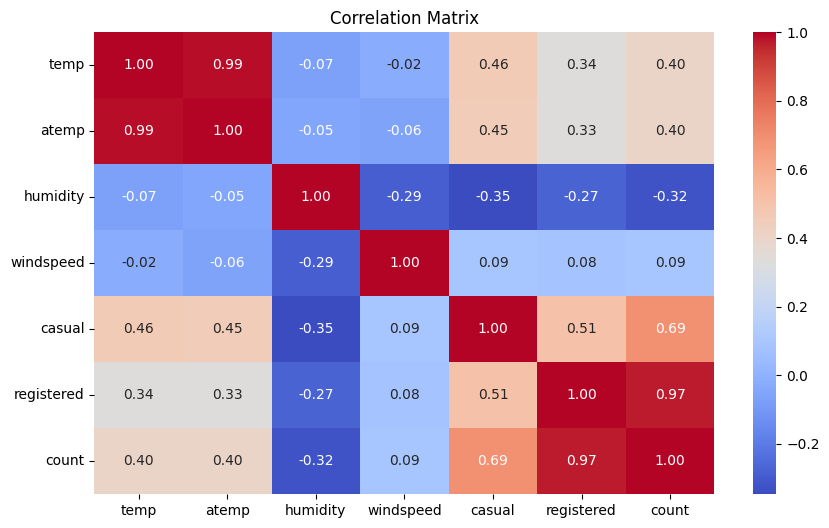

In [75]:
plt.figure(figsize=(10, 6))
corr_matrix = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

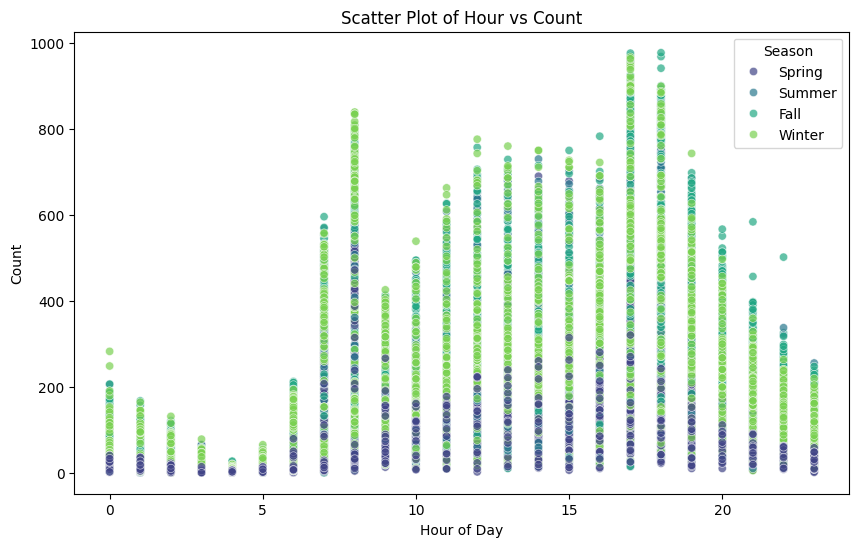

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hour', y='count', data=df, hue='season', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Hour vs Count')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Season')
plt.show()

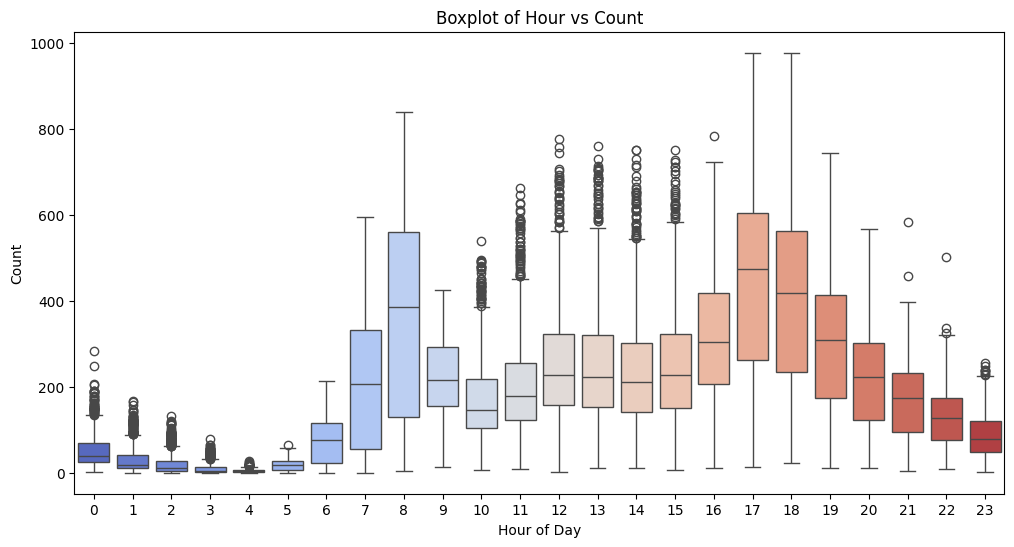

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='count', data=df, palette='coolwarm')
plt.title('Boxplot of Hour vs Count')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

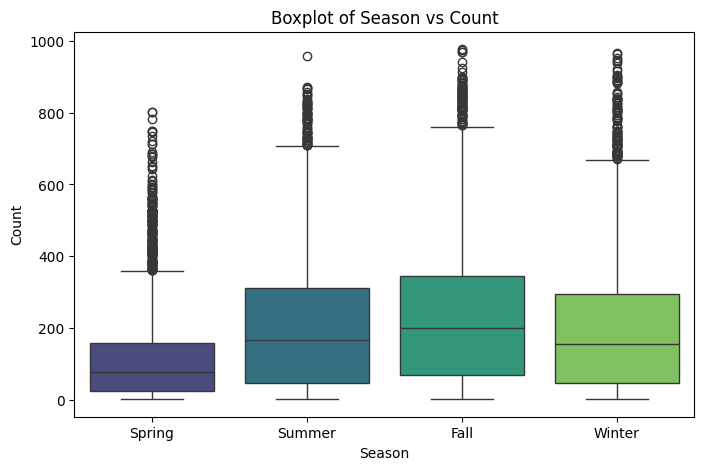

In [78]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='count', data=df, palette='viridis')
plt.title('Boxplot of Season vs Count')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

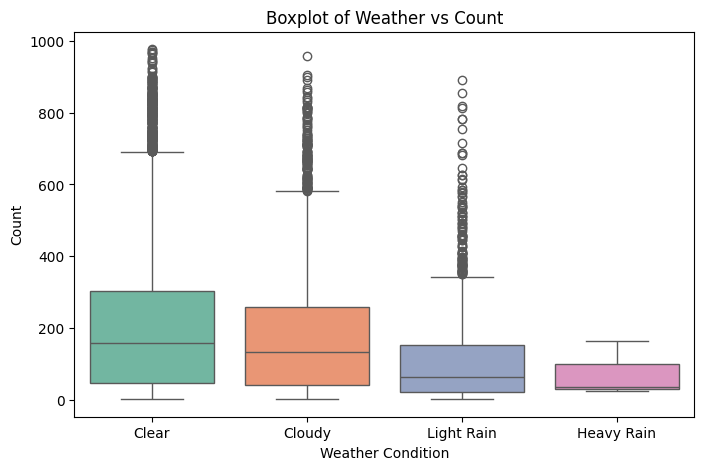

In [79]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='weather', y='count', data=df, palette='Set2')
plt.title('Boxplot of Weather vs Count')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

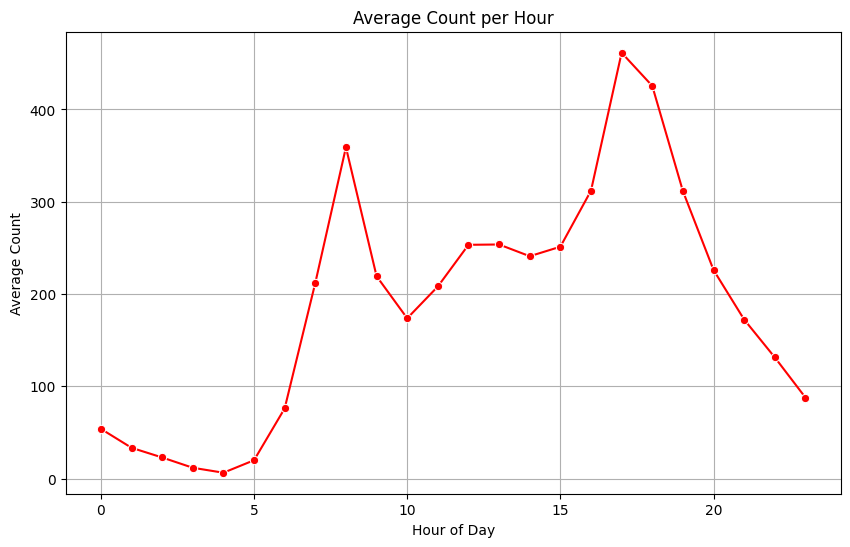

In [80]:
hourly_avg = df.groupby('hour')['count'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='count', data=hourly_avg, marker='o', color='red')
plt.title('Average Count per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')
plt.grid()
plt.show()

Insight:

- Korelasi yang tinggi antara `registered` dan `count`: Terdapat korelasi sebesar 97% antara jumlah pengguna terdaftar (`registered`) dan total jumlah pengguna (`count`), yang menunjukkan bahwa keduanya bergerak seiring.
- Distribusi `count` mengikuti pola jam sibuk: Plot distribusi jumlah pengguna (`count`) menunjukkan puncak-puncak aktivitas pada jam-jam berangkat dan pulang kerja, mengindikasikan adanya pola musiman yang konsisten pada jam tersebut.
- Tidak ada outlier pada jam sibuk (rush hour): Pada periode jam sibuk, seperti jam berangkat dan pulang kerja, tidak ditemukan outlier, yang menunjukkan bahwa jumlah pengguna pada jam-jam tersebut sangat konsisten dan stabil.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola rata-rata jumlah pengguna sepeda (casual dan registered) sepanjang hari dalam seminggu?

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

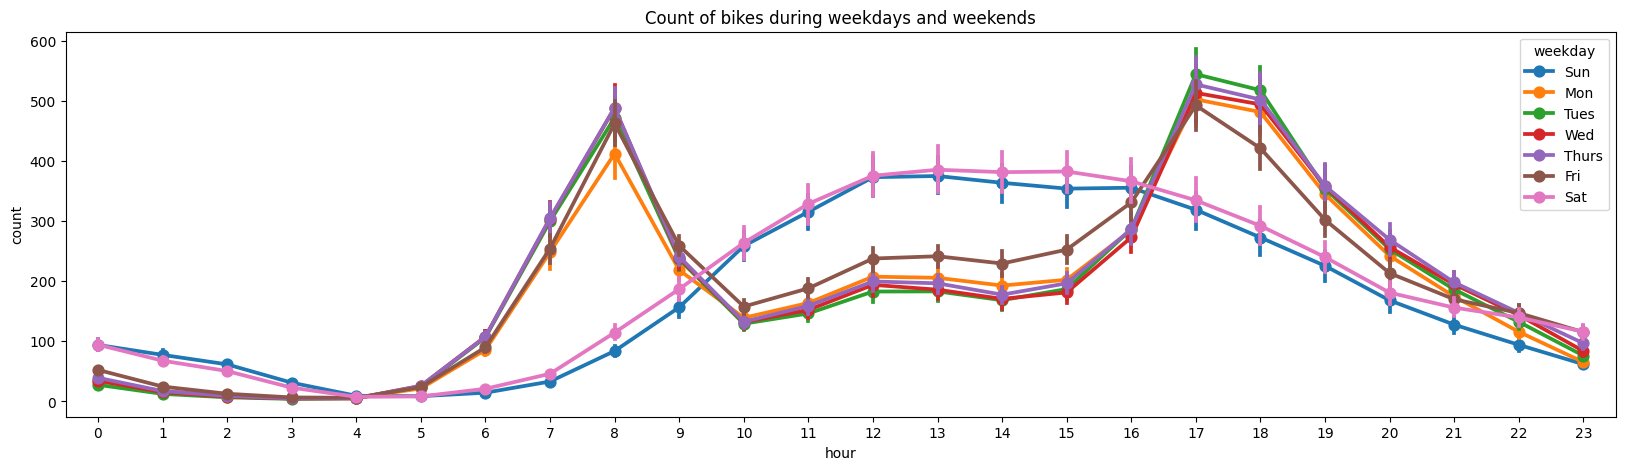

In [81]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

**Insight:**
- Terdapat dua puncak utama setiap hari: pada pagi hari sekitar pukul 7-8 dan sore hari sekitar pukul 17-18.
- Aktivitas pengguna sepeda meningkat tajam pada jam sibuk pagi dan sore hari, terutama pada hari kerja (Senin-Jumat).
- Pada akhir pekan (Sabtu dan Minggu), aktivitas lebih tinggi pada siang hari dibandingkan pagi hari, dengan distribusi yang lebih merata tanpa puncak yang tajam.

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

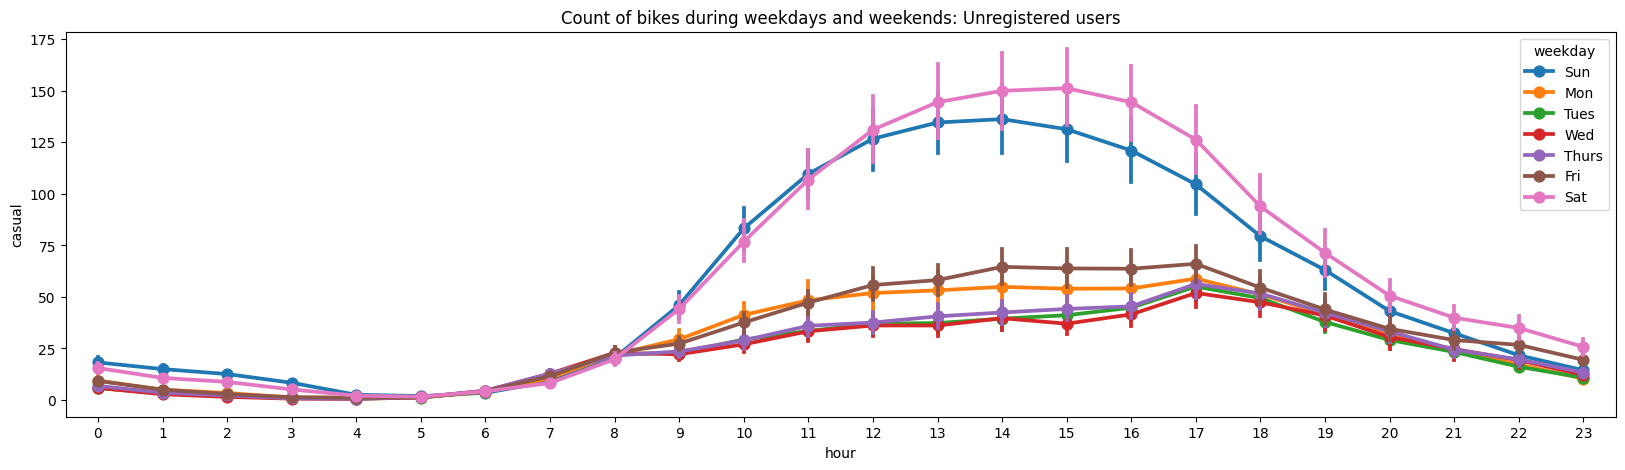

In [82]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')

**Insight:**
- Aktivitas pengguna casual lebih tinggi pada akhir pekan, dengan puncak aktivitas terjadi di siang hari sekitar pukul 12-15.
- Pada hari kerja, penggunaan cenderung rendah sepanjang hari, tanpa puncak signifikan.

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

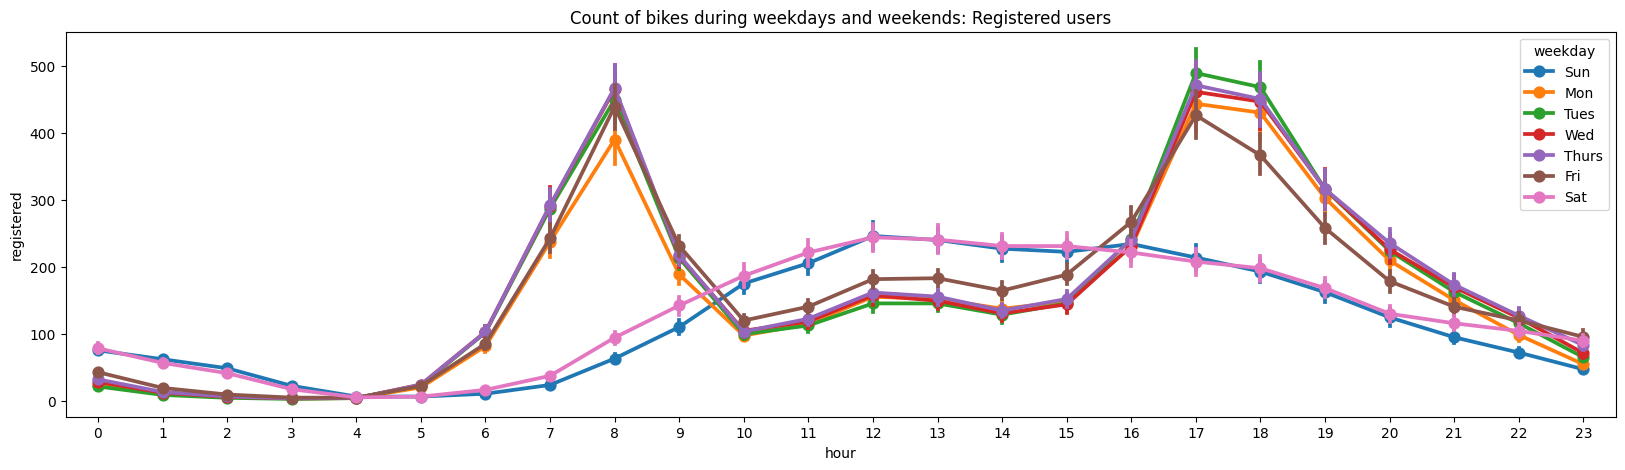

In [83]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')

**Insight:**
- Aktivitas pengguna terdaftar sangat terfokus pada jam sibuk pagi (7-8) dan sore (17-18) di hari kerja.
- Aktivitas menurun pada akhir pekan, dengan distribusi yang lebih merata sepanjang hari.

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca dan musim terhadap rata-rata jumlah pengguna sepeda per jam?

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

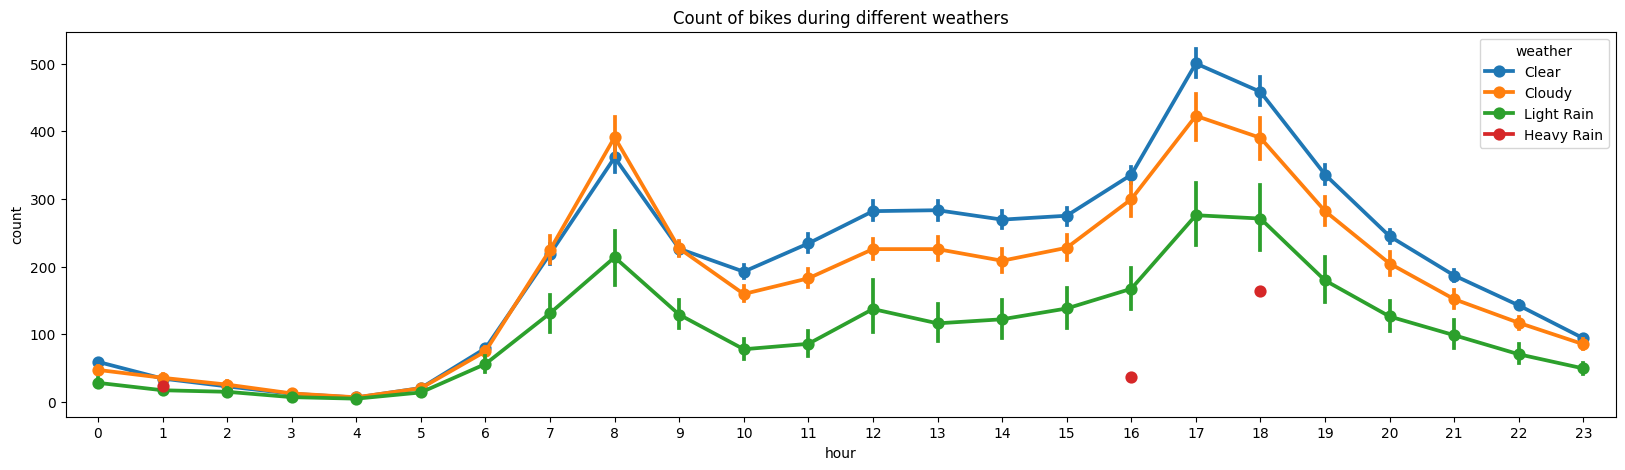

In [84]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Count of bikes during different weathers')

**Insight:**
- Pada cuaca clear (cerah), jumlah pengguna sepeda tertinggi sepanjang hari, terutama selama jam sibuk.
- Cuaca cloudy (berawan) juga menunjukkan pola penggunaan tinggi, tetapi sedikit lebih rendah dibandingkan cuaca cerah.
- Pada kondisi light rain (hujan ringan), penggunaan sepeda menurun secara signifikan di sepanjang hari.
- Kondisi heavy rain (hujan lebat) hampir tidak menunjukkan aktivitas pengguna sepeda, terutama pada jam-jam sore hari.

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

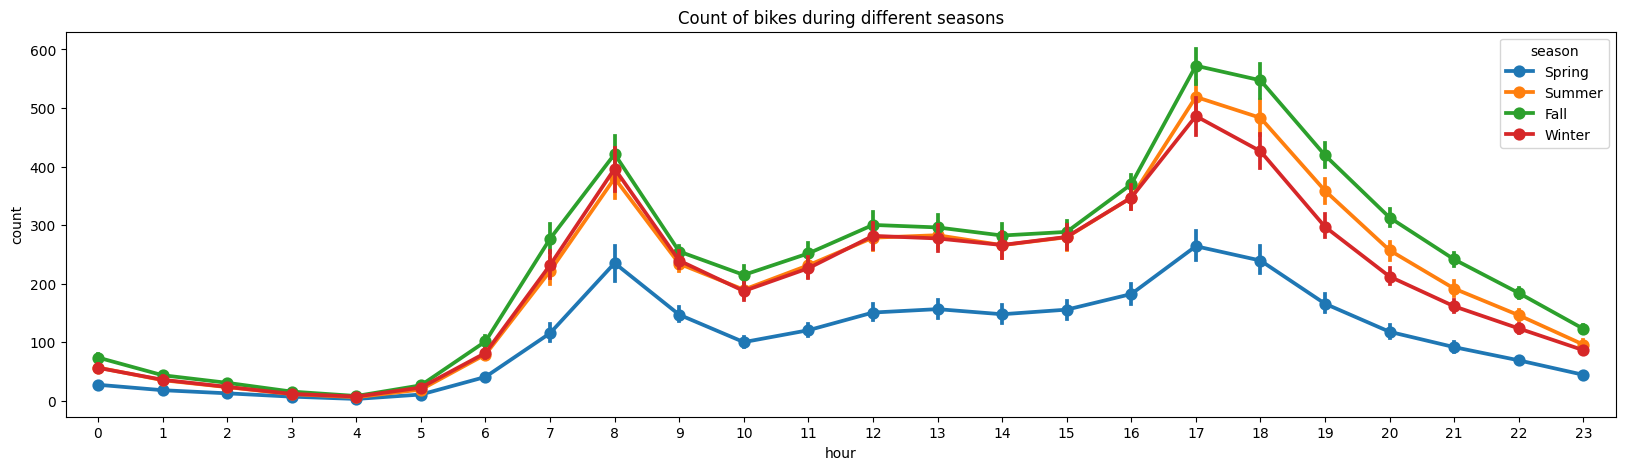

In [85]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

**Insight:**
- Pada musim spring, penggunaan sepeda lebih rendah dibandingkan musim lainnya di sepanjang hari.
- Puncak penggunaan sepeda terjadi pada jam sibuk (07:00-09:00 dan 17:00-19:00) dengan jumlah pengguna tertinggi di musim fall dan summer.
- Setelah jam sibuk pagi, pola penggunaan menurun secara signifikan, tetapi kembali meningkat menjelang sore.
- Musim winter memiliki pola yang mirip dengan fall dan summer tetapi dengan sedikit lebih sedikit pengguna.

## Analisis Lanjutan (Opsional)

**Clustering dengan Rush Hour**

Melakukan clustering berdasarkan rush hour memungkinkan pemahaman yang lebih mendalam tentang perbedaan pola penggunaan sepeda antara jam sibuk dan jam non-sibuk. Pada jam sibuk, pengguna sepeda cenderung didominasi oleh pengguna terdaftar (registered users) yang menggunakan sepeda untuk keperluan komuter, sedangkan pada jam non-sibuk, penggunaan oleh pengguna kasual lebih stabil. Dengan memisahkan kedua kelompok ini, analisis dapat lebih akurat dalam mengidentifikasi kebutuhan pengguna, memahami dampak faktor eksternal seperti cuaca dan musim, serta memberikan wawasan untuk optimalisasi layanan sepeda, seperti distribusi sepeda dan penempatan infrastruktur yang sesuai dengan permintaan waktu tertentu.

In [86]:
def is_rush_hour(hour):
    if (7 <= hour <= 9) or (17 <= hour <= 19):
        return "1"
    else:
        return "0"

df['rush_hour'] = df['hour'].apply(is_rush_hour)

df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,rush_hour
0,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16,0
1,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40,0
2,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32,0
3,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13,0
4,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1,0


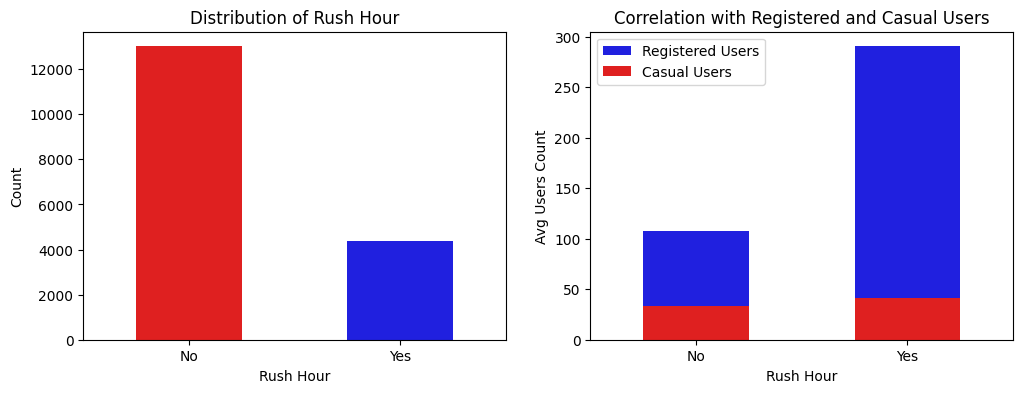

In [87]:
# @title Rush Hour
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.countplot(x='rush_hour', data=df, ax=ax[0],palette=['red','blue'], width=0.5)
ax[0].set_title('Distribution of Rush Hour')
ax[0].set_xticks([0, 1], ['No', 'Yes'])
ax[0].set_xlabel('Rush Hour')
ax[0].set_ylabel('Count')

sns.barplot(x='rush_hour',y='registered',data=df, label='Registered Users', color='blue', ax=ax[1], width=0.5, errorbar=None)
sns.barplot(x='rush_hour',y='casual',data=df, label='Casual Users', color='red', ax=ax[1], width=0.5, errorbar=None)
ax[1].set_title('Correlation with Registered and Casual Users')
ax[1].set_xticks([0, 1], ['No', 'Yes'])
ax[1].set_xlabel('Rush Hour')
ax[1].set_ylabel('Avg Users Count')

plt.legend()
fig.show();

**Insight:**
- Jumlah total penyewaan lebih tinggi pada non-rush hour karena durasi waktu yang jauh lebih panjang dibandingkan rush hour.
- Rata-rata penyewaan sepeda per jam lebih tinggi saat rush hour, menunjukkan tingginya kebutuhan sepeda pada waktu tersebut.
- Registered user mendominasi penggunaan sepeda selama rush hour, mengindikasikan penggunaan sepeda untuk perjalanan komuter.
- Penggunaan sepeda oleh casual user tetap stabil antara rush hour dan non-rush hour.
- Penyediaan sepeda yang lebih banyak pada rush hour diperlukan untuk memenuhi permintaan tinggi pengguna.

## Conclusion

**Bagaimana pola rata-rata jumlah pengguna sepeda (casual dan registered) sepanjang hari dalam seminggu?**

- Terdapat perbedaan pola penggunaan antara pengguna casual dan registered. Pengguna casual lebih aktif di akhir pekan, dengan puncak penggunaan di siang hari. Sebaliknya, pengguna registered memiliki aktivitas tinggi pada hari kerja, terutama saat jam sibuk pagi dan sore. Hal ini menunjukkan bahwa pengguna registered cenderung menggunakan sepeda untuk aktivitas komuter, sementara pengguna casual menggunakannya untuk rekreasi atau aktivitas lain di akhir pekan.

**Bagaimana pengaruh kondisi cuaca dan musim terhadap rata-rata jumlah pengguna sepeda per jam?**

- Cuaca cerah (clear) dan berawan (cloudy) mendukung tingginya penggunaan sepeda, sedangkan hujan ringan (light rain) menurunkan penggunaan secara signifikan, dan hujan lebat (heavy rain) menyebabkan penggunaan sepeda sangat rendah. Musim fall dan summer mencatat jumlah pengguna tertinggi, diikuti oleh winter, dan spring memiliki jumlah pengguna terendah. Hal ini menunjukkan bahwa cuaca dan musim berpengaruh signifikan terhadap minat masyarakat untuk menggunakan sepeda. Kondisi cuaca yang baik dan musim yang hangat mendorong penggunaan sepeda.
